# Image taging using Google Cloud Vision
In this notebook, we will use the [Google Cloud Vision](https://cloud.google.com/vision) to 'tag' out the elements in each image of our dataset. And make a histogram of these tags and find out the most representative tags for a certain genre.
<br/>
<br/>
Integrates Google Vision features, including image labeling, face, logo, and landmark detection, optical character recognition (OCR), and detection of explicit content, into applications.

## Authentication and Configuration

* [Set up a Cloud Vision API project](https://cloud.google.com/vision/docs/quickstart#set_up_a_google_cloud_vision_api_project) in the Google Cloud Platform Console.
* Set up your environment for using [Application Default Credentials](https://cloud.google.com/vision/docs/auth).

#### Python
* Install [Python](https://www.python.org/)
* [Install PIP](https://pip.pypa.io/en/latest/installing/)
* [Install the Google Cloud Client Library](https://cloud.google.com/vision/docs/libraries#installing_the_client_library) and the [Python Imaging Library](http://python-pillow.org/).
<br/>
<br/>
* Imports the Google Cloud client library
* Add environment variables with the JSON file applied in step 2
* Instantiates a client

In [1]:
import io
import os
import pandas as pd
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= 'Your creditial'
client = vision.ImageAnnotatorClient()

**Test on tagging one Image**
* Load the image into memory
* Convert image into acceptable type

In [6]:
# The name of the image file to annotate
file_name = 'C:/Users/qyao7/INFO7390/Final_MindaChen_QiuminZhang/dataset_merged/training/ambient/a0952779729_2.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

NameError: name 'types' is not defined

**Performs label detection on the image file**

In [12]:
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.desciption)

Labels:
musical instrument
keyboard
organist
keyboard player
piano
musical keyboard
electronic device
electronic instrument
musical instrument accessory
pianist


**get score for certain label**

In [26]:
labels[0].score

0.8603016138076782

**Tag all images**<br/>
We have tagged all images of the training set and it took quite a long time. Please check tags_all.csv for entire results.

In [32]:
dir = './dataset/training'

for obj in os.listdir(dir):
    if obj!='.DS_Store':
        tags = []
        print('working on %s' %(obj))
        try:
            for img in os.listdir(os.path.join(dir,obj)):
                if img!='.DS_Store' and img!='tags.csv':
                    try:
                        with io.open(os.path.join(dir,obj,img), 'rb') as image_file:
                            content = image_file.read()
                        image = types.Image(content=content)
                        response = client.label_detection(image=image)
                        labels = response.label_annotations
                        temp = {'file_name': img,
                                'genre': obj}
                        label_count = 0
                        for label in labels:
                            temp['Label'+str(label_count)] = label.description
                            temp['possibility'+str(label_count)] = label.score
                            label_count+=1
                        tags.append(temp)
                    except:
                        continue
        except:
            continue
        pd.DataFrame(tags).to_csv(os.path.join(dir,obj,'tags.csv'),header=True)

working on .DS_Store
working on metal
working on hiphop_rap
working on ambient
working on rock
working on folk
working on punk
working on soul
working on dubstep
working on jazz


**Plot first 20 tags that appear most in each genre**

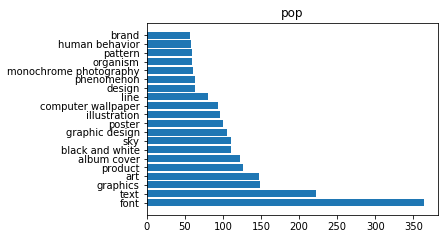

.DS_Store failed


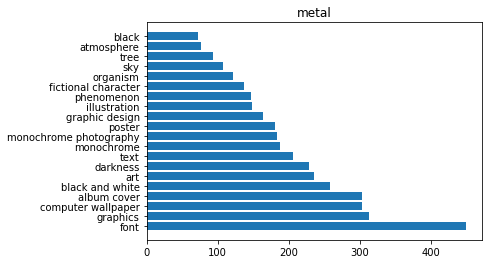

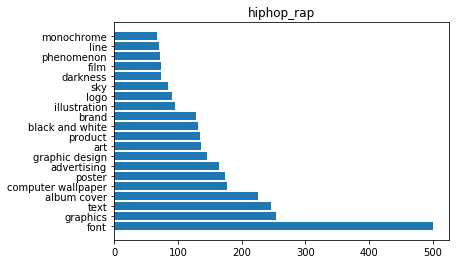

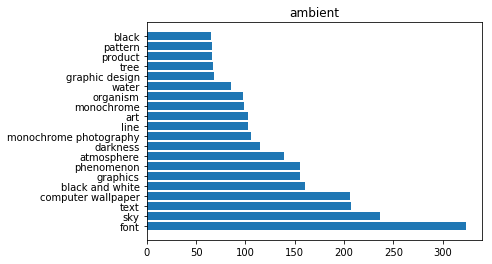

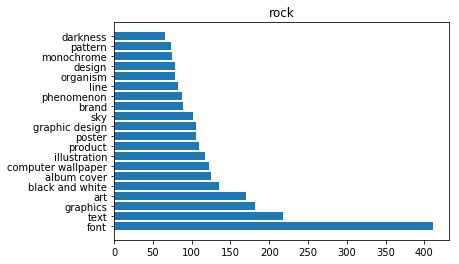

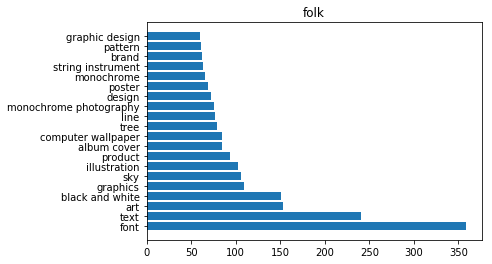

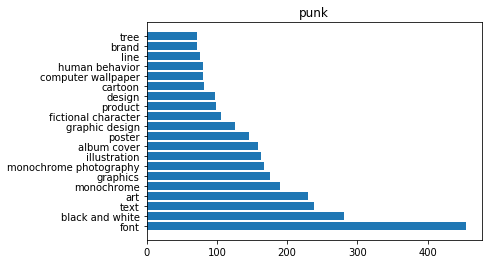

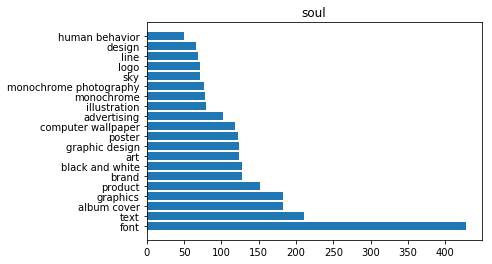

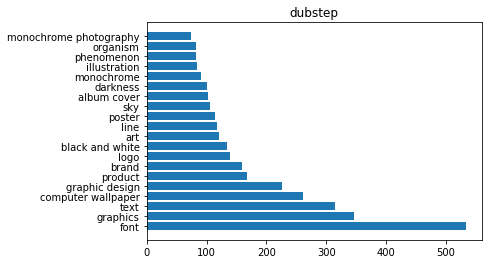

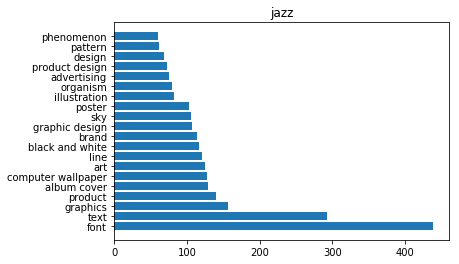

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig=plt.figure(figsize=(24, 12))
columns = 4
rows = 3
count = 1

for obj in os.listdir(dir):
    try:
        tags = pd.DataFrame.from_csv(os.path.join(dir, obj, 'tags.csv'))
        tags = tags.fillna(np.nan)
        
        list = []
        
        for i in tags.iloc[:,0:10]:
            for label in tags[i]:
                list.append(label)
        
        df = pd.DataFrame(list)
        v = df.iloc[:,0].unique()
        g = df.groupby(by = 0)[0].count().sort_values(ascending=False)
        r = range(min(len(v), 20))
        
        fig.add_subplot(rows,columns,count)
        plt.barh(r, g.head(20))
        plt.yticks(r, g.index)
        plt.title(obj)
        plt.show()
        count+=1
    except:
        print(obj+' failed')
        continue
plt.show()
fig.savefig('tags_hist.png')

# License
This project is licensed under the MIT License - see the file [LICENSE.md](https://github.com/qiuminzhang/discogs_scrapy/blob/master/LICENSE) for details

# Citation
https://cloud.google.com/vision/docs/tutorials